# Name: Nitin Shetty
## Investment Analysis Assignment Notebook.

In [159]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#raise exception for errors due to chained assignment
pd.set_option('mode.chained_assignment', 'raise')

In [160]:
### First read the input companies txt file, rounds2 csv file and the mapping file.

companies = pd.read_csv("./companies.txt", sep="\t", encoding = "ISO-8859-1")

rounds2 = pd.read_csv("./rounds2.csv", sep=",",  encoding = "ISO-8859-1")

mapping = pd.read_csv("./mapping.csv", sep=",",  encoding = "ISO-8859-1")


In [161]:
#companies.head()

#nr of unique companies
print(companies.permalink.nunique())

#change company permalink to upper case.
companies.permalink = companies.permalink.str.upper()
companies.permalink.nunique()

66368


66368

In [162]:
print(rounds2.shape)

#nr of unique companies 
print(rounds2.company_permalink.nunique())

#change company permalink to upper case.
rounds2.company_permalink = rounds2.company_permalink.str.upper()
rounds2.company_permalink.nunique()

(114949, 6)
90247


66370

In [163]:
#nr of companies in rounds2 not in companies
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [164]:
#merge the companies and rounds2, on permalink key
master_frame = pd.merge(companies, rounds2, how='inner', left_on='permalink', right_on='company_permalink')

In [165]:
#after join 7 rows are missing from rounds2
print(master_frame.shape)

master_frame.head(2)

(114942, 16)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


## ------------------------------------------------------------------------------------------------------------------------------------
### STAGE-01: Indentify Ideal Funding Round Type 
## ------------------------------------------------------------------------------------------------------------------------------------

In [166]:
#groupby data on 'funding_round_type' and get the global average for the 4 early round investment types.

mf_ft = master_frame.groupby('funding_round_type')
mf_ft_mean = mf_ft['raised_amount_usd'].mean().astype(np.int64)
mf_ft_mean_df = mf_ft_mean.to_frame()

mf_ft_mean_df = mf_ft_mean_df.reset_index()
mf_ft_mean_df = mf_ft_mean_df.loc[mf_ft_mean_df['funding_round_type'].isin(['venture', 'private_equity', 'seed', 'angel'])]

mf_ft_mean_df_sort = mf_ft_mean_df.sort_values(by=['raised_amount_usd'], ascending=False)
mf_ft_mean_df_sort

,funding_round_type,raised_amount_usd
8,private_equity,73308593
13,venture,11748949
0,angel,958694
11,seed,719779


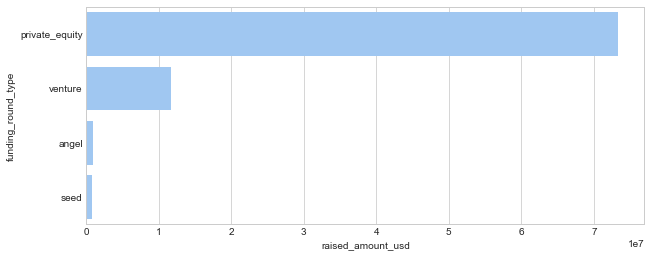

In [167]:
#Plot a bar plot for Average Global Funding Amount vs Funding Type

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="raised_amount_usd", y="funding_round_type", data=mf_ft_mean_df_sort,
            label="Total", color="b")

In [168]:
#groupby data on 'funding_round_type' and get the global total funding for the 4 early round investment types.

mf_ft_grp = master_frame.groupby('funding_round_type')
mf_ft_grp_sum = mf_ft_grp.raised_amount_usd.sum().astype(np.int64)
mf_ft_grp_sum_df = mf_ft_grp_sum.to_frame()

mf_ft_grp_sum_df = mf_ft_grp_sum_df.reset_index()
mf_ft_grp_sum_df = mf_ft_grp_sum_df.loc[mf_ft_grp_sum_df['funding_round_type'].isin(['venture', 'private_equity', 'seed', 'angel'])]

mf_ft_grp_sum_df_sort = mf_ft_grp_sum_df.sort_values(by=['raised_amount_usd'], ascending=False)
mf_ft_grp_sum_df_sort

,funding_round_type,raised_amount_usd
13,venture,590126216876
8,private_equity,141925436105
11,seed,16988238596
0,angel,4659255123


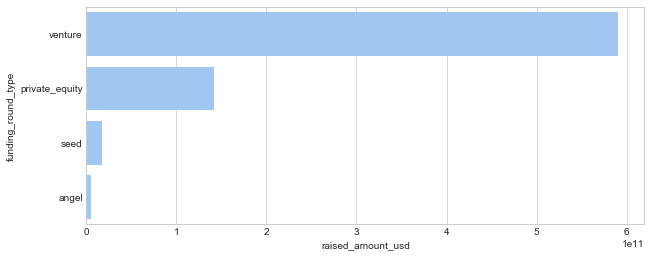

In [169]:
#Plot a bar plot for Total Global Funding Amount vs Funding Type

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="raised_amount_usd", y="funding_round_type", data=mf_ft_grp_sum_df_sort,
            label="Total", color="b")

In [170]:
#Extract all investement for the Venture Funding type
mf_venture = master_frame.loc[master_frame['funding_round_type'] == 'venture']

In [171]:
print(mf_venture.shape)
mf_venture.head(2)

(55493, 16)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


## ------------------------------------------------------------------------------------------------------------------------------------
### STAGE-02: For the Venture Funding Type, Identify the Top9 Countries.
## ------------------------------------------------------------------------------------------------------------------------------------

In [172]:
#for the venture type investments, groupby country code and get total amount raised 
#and determine the top3 english speaking countries.

mf_venture_ctr_grp = mf_venture.groupby('country_code')

mf_venture_ctr_sum = mf_venture_ctr_grp.raised_amount_usd.sum().astype(np.int64)

mf_venture_ctr_sum_df = mf_venture_ctr_sum.to_frame()

mf_venture_ctr_sum_df_sort = mf_venture_ctr_sum_df.sort_values(by=['raised_amount_usd'], ascending=False).head(9)

mf_venture_ctr_sum_df_sort

,raised_amount_usd
country_code,
USA,422510842796
CHN,39835418773
GBR,20245627416
IND,14391858718
CAN,9583332317
FRA,7259536732
ISR,6907514579
DEU,6346959822
JPN,3363676611


In [173]:
#top9 contains all venture investments for top9 countries

top9 = mf_venture.loc[mf_venture['country_code'].isin(mf_venture_ctr_sum_df_sort.index)].copy()

top9.head(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [174]:
#for the 9 countries groupby data on 'country_code' and get the total investment for venture investments.

top9_ctr_grp = top9.groupby('country_code')
top9_ctr_grp_sum = top9_ctr_grp.raised_amount_usd.sum().astype(np.int64)
top9_ctr_grp_sum_df = top9_ctr_grp_sum.to_frame()

top9_ctr_grp_sum_df_sort = top9_ctr_grp_sum_df.sort_values(by=['raised_amount_usd'], ascending=False)
top9_ctr_grp_sum_df_sort
top9_ctr_grp_sum_df_sort = top9_ctr_grp_sum_df_sort.reset_index()
top9_ctr_grp_sum_df_sort

,country_code,raised_amount_usd
0,USA,422510842796
1,CHN,39835418773
2,GBR,20245627416
3,IND,14391858718
4,CAN,9583332317
5,FRA,7259536732
6,ISR,6907514579
7,DEU,6346959822
8,JPN,3363676611


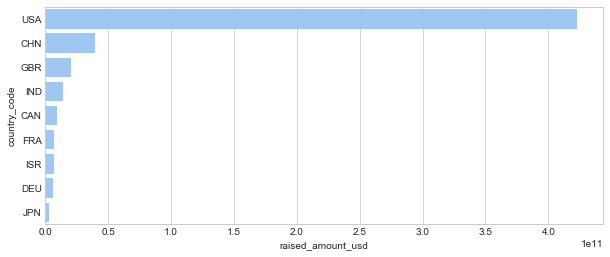

In [175]:
#for the 9 countries Plot a bar plot for Country vs the Total Funding Amount

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="raised_amount_usd", y="country_code", data=top9_ctr_grp_sum_df_sort,
            label="Total", color="b")

## ------------------------------------------------------------------------------------------------------------------------------------
### STAGE-03: For the Venture Funding Type And The Top9 Countries, Identify the Top 3 Main sectors.
## ------------------------------------------------------------------------------------------------------------------------------------

In [176]:
top9.category_list.head(5)

0                                                Media
1    Application Platforms|Real Time|Social Network...
4                                          Curated Web
5                                             Software
8                                        Biotechnology
Name: category_list, dtype: object

In [177]:
#extract the primary category from the category list for each investment
#eg: extract 'Application Platforms' from 'Application Platforms|Real Time|Social Network...'
top9['primary_category'] = top9.category_list.str.extract('([^\|]+)', expand=False)
top9.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology


In [178]:
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [179]:
#Function to return the main category for each row of category list of the mapping dataset
def get_main_category(row_df):
    main_category = ''
    if row_df[1] == 1:
        main_category = 'Automotive_Sports'
    if row_df[2] == 1:
        main_category = 'Blanks'
    if row_df[3] == 1:
        main_category = 'Cleantech_Semiconductors'
    if row_df[4] == 1:
        main_category = 'Entertainment'
    if row_df[5] == 1:
        main_category = 'Health'
    if row_df[6] == 1:
        main_category = 'Manufacturing'
    if row_df[7] == 1:
        main_category = 'News_Search_Messaging'
    if row_df[8] == 1:
        main_category = 'Others'
    if row_df[9] == 1:
        main_category = 'Social_Finance_Analytics_Advertising'
    return(main_category)

In [180]:
#dummy code to replace function with lamda
#temp = mapping.apply(lambda x: mapping.columns[1], axis = 1)
#temp = mapping.apply(lambda x: x.argmax(), axis = 1)
#row[row.columns[1]] == 1
#row.apply(lambda x: x.argmax(), axis=1)
#row.iloc[0]

In [181]:
#Identify the main_category for each category in the mapping data set
mapping['main_category'] = mapping.apply(get_main_category, axis=1)
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_category
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,Social_Finance_Analytics_Advertising


In [182]:
#update the top9 df with the main_category from the mapping df
top9_cat = pd.merge(top9, mapping[['category_list','main_category']],left_on='primary_category', right_on='category_list', how='left')

top9_cat.head(5)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category,category_list_y,main_category
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms,Application Platforms,News_Search_Messaging
2,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web,Curated Web,News_Search_Messaging
3,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software,Software,Others
4,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology,Biotechnology,Cleantech_Semiconductors


In [183]:
#Create a separate dataframe D1 for the First Top Country

D1 = top9_cat.loc[(top9_cat['country_code'] == 'USA')                 
                & (top9_cat['raised_amount_usd'] >= 5000000)
                & (top9_cat['raised_amount_usd'] <= 15000000)].copy()

D1.head(5)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category,category_list_y,main_category
7,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics,NaN,NaN
8,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps,Apps,News_Search_Messaging
35,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,Service Providers,Service Providers,Others
38,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,Manufacturing,Manufacturing,Manufacturing
39,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,Manufacturing,Manufacturing,Manufacturing


In [184]:
#Create a separate dataframe D2 for the Second Top Country

D2 = top9_cat.loc[(top9_cat['country_code'] == 'GBR')                 
                & (top9_cat['raised_amount_usd'] >= 5000000)
                & (top9_cat['raised_amount_usd'] <= 15000000)].copy()

D2.head(5)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category,category_list_y,main_category
156,/ORGANIZATION/365SCORES,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,Android,Android,Social_Finance_Analytics_Advertising
359,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,Content Creators,Content Creators,Entertainment
360,/ORGANIZATION/7DIGITAL,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,Content Creators,Content Creators,Entertainment
391,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
392,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment


In [185]:
#Create a separate dataframe D3 for the Third Top Country

D3 = top9_cat.loc[(top9_cat['country_code'] == 'IND') 
                & (top9_cat['raised_amount_usd'] >= 5000000)
                & (top9_cat['raised_amount_usd'] <= 15000000)].copy()

D3.head(5)

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category,category_list_y,main_category
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
84,/ORGANIZATION/21DIAMONDS-INDIA,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,E-Commerce,E-Commerce,Others
425,/ORGANIZATION/A-LITTLE-WORLD,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,Finance,NaN,NaN
1174,/ORGANIZATION/ADLABS-IMAGICA,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Entertainment,Entertainment,Entertainment
1584,/ORGANIZATION/AGILE,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,Finance,NaN,NaN


In [186]:
#for the First Top Country, get the main sector wise: nr of investments and sum of investments
D1_grp = D1.groupby('main_category')

D1_grp_count = D1_grp['raised_amount_usd'].count()
D1_grp_count_df = D1_grp_count.to_frame()
print("\nD1 Total Count: " , D1_grp_count_df['raised_amount_usd'].sum())
D1_grp_count_df_sort = D1_grp_count_df.sort_values(by=['raised_amount_usd'], ascending=False)
print(D1_grp_count_df_sort)

D1_grp_sum = D1_grp['raised_amount_usd'].sum().astype(np.int64)
D1_grp_sum_df = D1_grp_sum.to_frame()
print("\nD1 Total Investment: " , D1_grp_sum_df['raised_amount_usd'].sum())
D1_grp_sum_df_sort = D1_grp_sum_df.sort_values(by=['raised_amount_usd'], ascending=False)
print(D1_grp_sum_df_sort)


D1 Total Count:  11235
                                      raised_amount_usd
main_category                                          
Others                                             2923
Cleantech_Semiconductors                           2297
Social_Finance_Analytics_Advertising               1912
News_Search_Messaging                              1563
Health                                              908
Manufacturing                                       799
Entertainment                                       580
Automotive_Sports                                   167
Blanks                                               86

D1 Total Investment:  100426287841
                                      raised_amount_usd
main_category                                          
Others                                      26089280296
Cleantech_Semiconductors                    21181003033
Social_Finance_Analytics_Advertising        16680695048
News_Search_Messaging                       

In [187]:
D1_grp_count_df_sort = D1_grp_count_df_sort.reset_index()
D1_grp_count_df_sort = D1_grp_count_df_sort.loc[D1_grp_count_df_sort['main_category']!='Others']
D1_grp_count_df_sort

,main_category,raised_amount_usd
1,Cleantech_Semiconductors,2297
2,Social_Finance_Analytics_Advertising,1912
3,News_Search_Messaging,1563
4,Health,908
5,Manufacturing,799
6,Entertainment,580
7,Automotive_Sports,167
8,Blanks,86


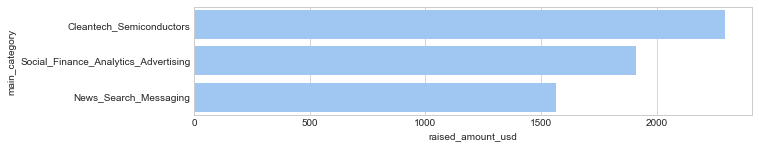

In [188]:
#plot a bar graph for the top 3 main sectors vs nr of investments

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="raised_amount_usd", y="main_category", data=D1_grp_count_df_sort.head(3),
            label="Total", color="b")

In [189]:
#for the Second Top Country, get the main sector wise: nr of investments and sum of investments
D2_grp = D2.groupby('main_category')

D2_grp_count = D2_grp['raised_amount_usd'].count()
D2_grp_count_df = D2_grp_count.to_frame()
print("\nD2 Total Count: " , D2_grp_count_df['raised_amount_usd'].sum())
D2_grp_count_df_sort = D2_grp_count_df.sort_values(by=['raised_amount_usd'], ascending=False)
print(D2_grp_count_df_sort)

D2_grp_sum = D2_grp['raised_amount_usd'].sum().astype(np.int64)
D2_grp_sum_df = D2_grp_sum.to_frame()
print("\nD2 Total Investment: " , D2_grp_sum_df['raised_amount_usd'].sum())
D2_grp_sum_df_sort = D2_grp_sum_df.sort_values(by=['raised_amount_usd'], ascending=False)
print(D2_grp_sum_df_sort)


D2 Total Count:  584
                                      raised_amount_usd
main_category                                          
Others                                              143
Cleantech_Semiconductors                            127
Social_Finance_Analytics_Advertising                 98
News_Search_Messaging                                73
Entertainment                                        54
Manufacturing                                        42
Health                                               24
Automotive_Sports                                    16
Blanks                                                7

D2 Total Investment:  5086469206
                                      raised_amount_usd
main_category                                          
Others                                       1249124289
Cleantech_Semiconductors                     1136905008
Social_Finance_Analytics_Advertising          821888357
News_Search_Messaging                         61

In [190]:
D2_grp_count_df_sort = D2_grp_count_df_sort.reset_index()
D2_grp_count_df_sort = D2_grp_count_df_sort.loc[D2_grp_count_df_sort['main_category']!='Others']
D2_grp_count_df_sort

,main_category,raised_amount_usd
1,Cleantech_Semiconductors,127
2,Social_Finance_Analytics_Advertising,98
3,News_Search_Messaging,73
4,Entertainment,54
5,Manufacturing,42
6,Health,24
7,Automotive_Sports,16
8,Blanks,7


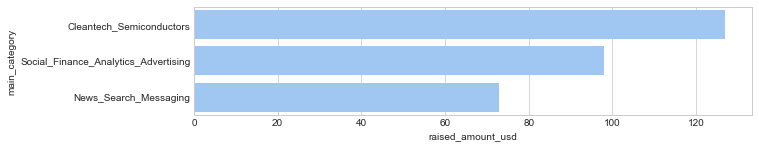

In [191]:
#plot a bar graph for the top 3 main sectors vs nr of investments

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="raised_amount_usd", y="main_category", data=D2_grp_count_df_sort.head(3),
            label="Total", color="b")

In [192]:
#for the Third Top Country, get the main sector wise: nr of investments and sum of investments
D3_grp = D3.groupby('main_category')

D3_grp_count = D3_grp['raised_amount_usd'].count()
D3_grp_count_df = D3_grp_count.to_frame()
print("\nD3 Total Count: " , D3_grp_count_df['raised_amount_usd'].sum())
D3_grp_count_df_sort = D3_grp_count_df.sort_values(by=['raised_amount_usd'], ascending=False)
print(D3_grp_count_df_sort)

D3_grp_sum = D3_grp['raised_amount_usd'].sum().astype(np.int64)
D3_grp_sum_df = D3_grp_sum.to_frame()
print("\nD3 Total Investment: " , D3_grp_sum_df['raised_amount_usd'].sum())
D3_grp_sum_df_sort = D3_grp_sum_df.sort_values(by=['raised_amount_usd'], ascending=False)
print(D3_grp_sum_df_sort)


D3 Total Count:  301
                                      raised_amount_usd
main_category                                          
Others                                              109
News_Search_Messaging                                52
Entertainment                                        33
Social_Finance_Analytics_Advertising                 32
Manufacturing                                        21
Cleantech_Semiconductors                             20
Health                                               19
Automotive_Sports                                    13
Blanks                                                2

D3 Total Investment:  2710537552
                                      raised_amount_usd
main_category                                          
Others                                       1007409507
News_Search_Messaging                         433834545
Social_Finance_Analytics_Advertising          290543500
Entertainment                                 28

In [193]:
D3_grp_count_df_sort = D3_grp_count_df_sort.reset_index()
D3_grp_count_df_sort = D3_grp_count_df_sort.loc[D3_grp_count_df_sort['main_category']!='Others']
D3_grp_count_df_sort

,main_category,raised_amount_usd
1,News_Search_Messaging,52
2,Entertainment,33
3,Social_Finance_Analytics_Advertising,32
4,Manufacturing,21
5,Cleantech_Semiconductors,20
6,Health,19
7,Automotive_Sports,13
8,Blanks,2


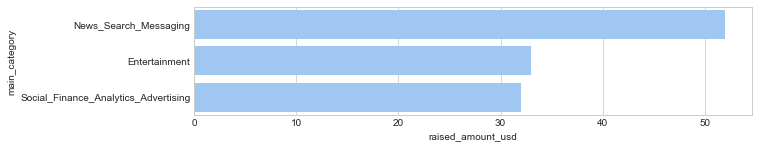

In [194]:
#plot a bar graph for the top 3 main sectors vs nr of investments

# set a seaborn style of your taste
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="raised_amount_usd", y="main_category", data=D3_grp_count_df_sort.head(3),
            label="Total", color="b")

In [196]:
#print the company with the maximum investment, for each of the three country, for each of the three main sectors, 
#which received the maximum funding

#D1.loc[D1['main_category'] == 'Cleantech_Semiconductors'].sort_values(by='raised_amount_usd', ascending=False).head(1)  
#D1.loc[D1['main_category'] == 'Social_Finance_Analytics_Advertising'].sort_values(by='raised_amount_usd', ascending=False).head(1)
#D1.loc[D1['main_category'] == 'News_Search_Messaging'].sort_values(by='raised_amount_usd', ascending=False).head(1)

#D2.loc[D2['main_category'] == 'Cleantech_Semiconductors'].sort_values(by='raised_amount_usd', ascending=False).head(1)
#D2.loc[D2['main_category'] == 'Social_Finance_Analytics_Advertising'].sort_values(by='raised_amount_usd', ascending=False).head(1)
#D2.loc[D2['main_category'] == 'News_Search_Messaging'].sort_values(by='raised_amount_usd', ascending=False).head(1)

#D3.loc[D3['main_category'] == 'News_Search_Messaging'].sort_values(by='raised_amount_usd', ascending=False).head(1)
#D3.loc[D3['main_category'] == 'Entertainment'].sort_values(by='raised_amount_usd', ascending=False).head(1)
D3.loc[D3['main_category'] == 'Social_Finance_Analytics_Advertising'].sort_values(by='raised_amount_usd', ascending=False).head(1)



,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category,category_list_y,main_category
22792,/ORGANIZATION/KOMLI-MEDIA,Komli Media,http://www.komli.com,Advertising|Analytics|Media,operating,IND,16,Mumbai,Mumbai,01-10-2006,/ORGANIZATION/KOMLI-MEDIA,/funding-round/905a09df7016ecdbedd0cc837f98aa42,venture,C,19-01-2011,15000000.0,Advertising,Advertising,Social_Finance_Analytics_Advertising
